<a href="https://colab.research.google.com/github/almiaa/tugasPembelajaranMesin/blob/main/E1E122032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/data_date.csv" )
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [3]:
df.shape

(12986, 4)

In [4]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       12986 non-null  object
 1   Country    12986 non-null  object
 2   Status     12986 non-null  object
 3   AQI Value  12986 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 405.9+ KB


In [6]:
df.Country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [7]:
df["Country"]= df["Country"].replace({'United Kingdom of Great Britain and Northern Ireland':"Great Britain",'United States of America':"USA"})

# Pembagian Fitur dan Target

In [8]:
dataframed = pd.read_csv("/content/data_date.csv")

**fitur (x)**

In [9]:
X = dataframed['AQI Value']
X.head()

0     14
1     65
2     55
3    113
4     63
Name: AQI Value, dtype: int64

**target (y)**

In [10]:
y = dataframed['Status']
y.head()

0                              Good
1                          Moderate
2                          Moderate
3    Unhealthy for Sensitive Groups
4                          Moderate
Name: Status, dtype: object

# Training dan Testing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

**Membagi data (20% data testing)**

In [12]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = dataframed['AQI Value']
y = dataframed['Status']

# Membagi dataset menjadi data latih dan data uji (dalam contoh ini, proporsi data uji adalah 20% dari total data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah sampel dalam data latih dan data uji
print("Jumlah sampel dalam data latih:", len(X_train))
print("Jumlah sampel dalam data uji:", len(X_test))

Jumlah sampel dalam data latih: 10388
Jumlah sampel dalam data uji: 2598


In [13]:
print('Shape of Data (20%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (10388,)
y_train shape :  (10388,)
X_test shape :  (2598,)
y_test shape :  (2598,)


**Mengubah data kategorik pada kolom 'Status' menjadi data numerik**

In [14]:
# Menampilkan nilai unik dalam kolom 'Status' untuk memeriksa apakah ada nilai yang tidak ada dalam kamus status_mapping
print(dataframed['Status'].unique())

# Membuat kamus yang menetapkan nilai angka ke masing-masing kategori status
status_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Unhealthy for Sensitive Groups': 4,
    'Very Unhealthy': 5,
    'Hazardous': 6
}

# Menggunakan metode map() untuk mengubah nilai dalam kolom 'Status' sesuai dengan kamus status_mapping
dataframed['Status'] = dataframed['Status'].map(status_mapping)

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print(dataframed.head())

['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
         Date    Country  Status  AQI Value
0  2022-07-21    Albania       1         14
1  2022-07-21    Algeria       2         65
2  2022-07-21    Andorra       2         55
3  2022-07-21     Angola       4        113
4  2022-07-21  Argentina       2         63


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd  # Import pandas library

# Memisahkan fitur (X) dan target (y), tanpa kolom 'Date'
X = dataframed[['AQI Value']]  # Memperhatikan bahwa fitur harus dalam bentuk DataFrame atau array 2D
y = dataframed['Status']

# Membagi dataset menjadi data latih dan data uji (dalam contoh ini, proporsi data uji adalah 20% dari total data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data latih
clf.fit(X_train, y_train)

# Melakukan prediksi terhadap data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

Akurasi model: 1.0


# Menggunakan Cross Validation

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi model Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Melakukan validasi silang dengan 5 lipatan
cv_scores = cross_val_score(clf, X, y, cv=5)

# Menampilkan skor validasi silang untuk setiap lipatan
print("Cross-validation scores:", cv_scores)

# Menampilkan rata-rata skor validasi silang
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [1.         1.         1.         0.99922988 0.99922988]
Average cross-validation score: 0.9996919522525992


In [17]:
!pip install graphviz

In [18]:
from sklearn.tree import export_graphviz
import graphviz

# Melatih model Decision Tree Classifier
clf.fit(X, y)

# Ekspor pohon ke file dot
export_graphviz(clf, out_file="/content/data_tree.dot",
                feature_names=X.columns,
                class_names=[str(i) for i in clf.classes_],  # Mengonversi tipe data numpy.int64 menjadi string
                filled=True, rounded=True, special_characters=True)


# Konversi file dot menjadi gambar
with open("/content/data_tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(filename='decision_tree', format='png', cleanup=True)

'decision_tree.png'

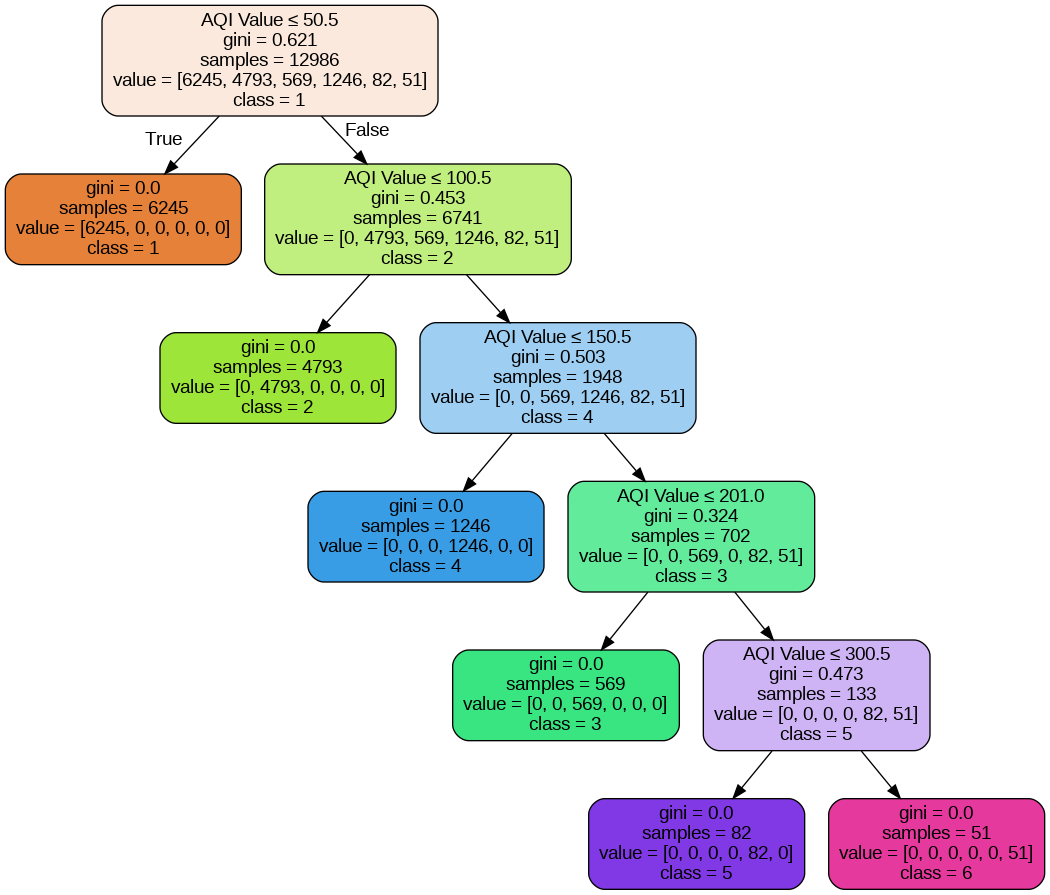

In [20]:
from IPython.display import Image

# Membaca file gambar
Image("/content/decision_tree.png")